In [1]:
%matplotlib inline
from riesling_utils import plot_3plane, plot_sense, plot_diff

In [2]:
matrix = 64
read_os = 2
snr = 8
chan = 16
rings = 2
gap=3
!rm full*.h5 gap*.h5

# Reference Data Set

First simulate a reference phantom dataset with no dead-time gap and directly extract SENSE maps as a reference

In [3]:
!riesling phantom --matrix={matrix} --read={read_os} --snr={snr} --channels={chan} --rings={rings} --shepp_logan --kb full

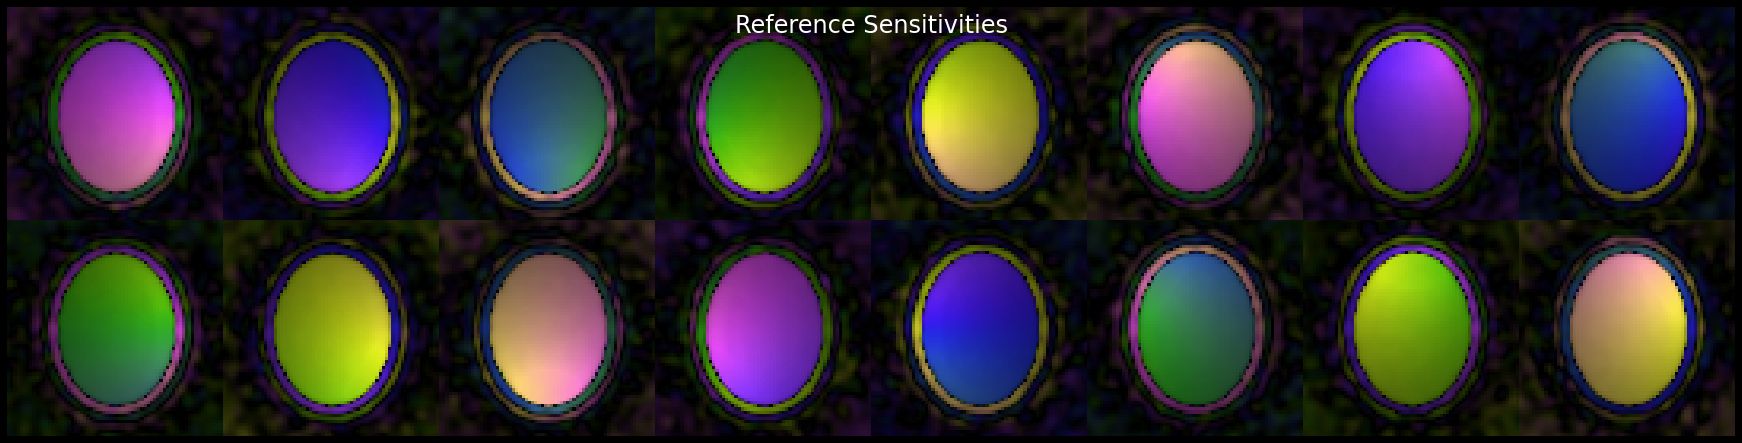

In [4]:
!riesling sense --kb full.h5 --lambda=100 --fov=256
plot_sense('full-sense.h5', title='Reference Sensitivities')

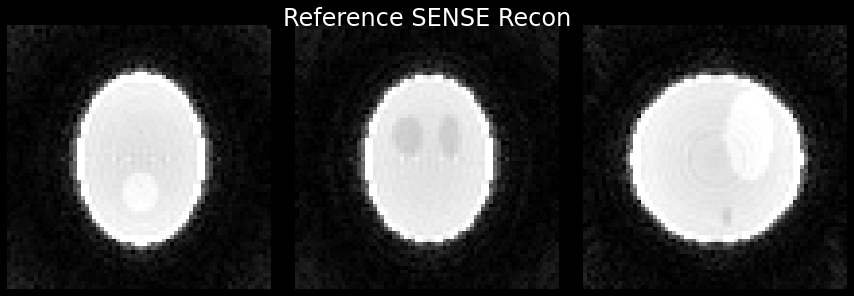

In [5]:
!riesling recon --kb full.h5 --sense=full-sense.h5 -o full-sense --fov=256
plot_3plane('full-sense-recon.h5', title='Reference SENSE Recon')

# Gap Data

Now simulate a phantom including a dead-time gap and repeat the above. Note how the directly-extracted maps are corrupted, leading to a poor reconstruction with artefacts.

In [6]:
!riesling phantom --matrix=$matrix --read=$read_os --snr=$snr --channels=$chan --rings=$rings --shepp_logan --kb --gap=$gap gap

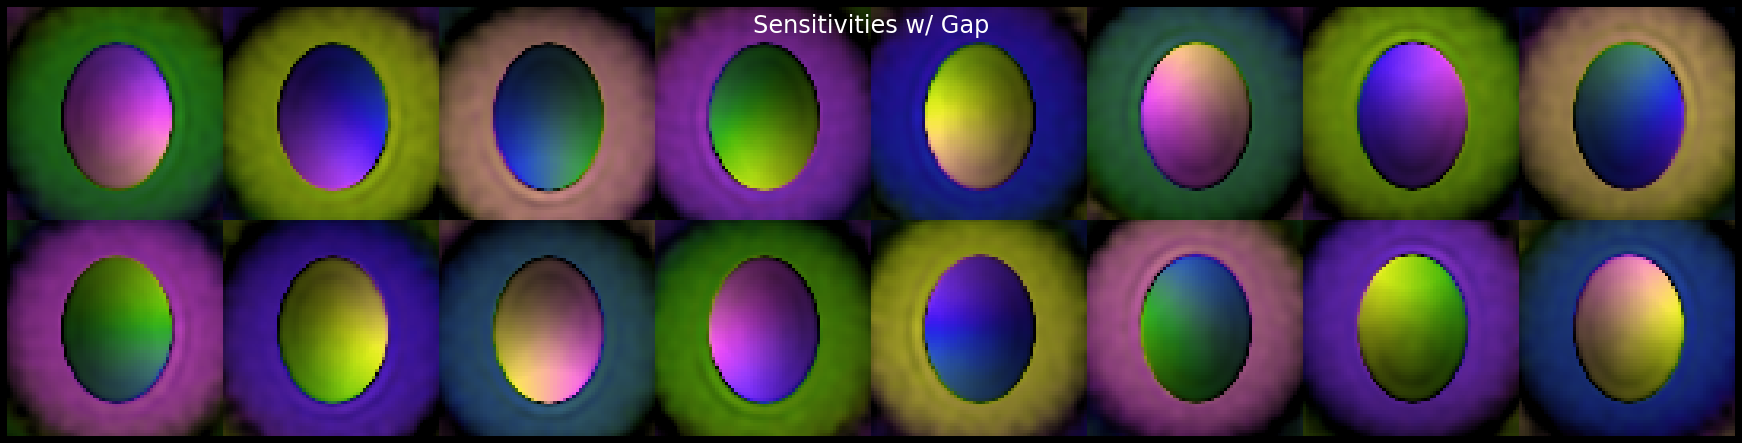

In [7]:
!riesling sense --kb gap.h5 --lambda=100 --fov=256
plot_sense('gap-sense.h5', title='Sensitivities w/ Gap')

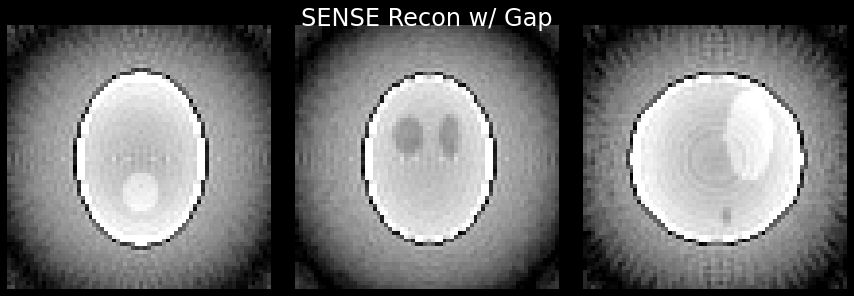

In [8]:
!riesling recon --kb gap.h5 --sense=gap-sense.h5 -o gap-sense --fov=256
plot_3plane('gap-sense-recon.h5', title='SENSE Recon w/ Gap')

#ESPIRiT
Now use ESPIRiT to recover the sensitivities avoiding the dead-time gap, giving correct maps. However the reconstruction will still have artefacts because the data itself still has a dead-time gap

Starting operation: espirit
Read wisdom successfully
Opened file gap.h5 for reading
Reading trajectory
Read dataset: trajectory
Created trajectory object with 4096 spokes
Reading non-cartesian volume 0
Read dataset: noncartesian chunk: 0
Cropping data to 8 mm effective resolution
Image res 3.75 SENSE res 8 ratio 0.46875
Trimming data to read points 0-30
Created trajectory object with 4096 spokes
Grid size 128,128,128, oversample 2
Generated 110592 co-ordinates in 16 ms
Using Pipe/Zwart/Menon SDC...
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%
Combining thread workspaces
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%
SDC Delta 6.5988975
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%
Combining thread workspaces
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%
SDC Delta 0.28271922
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%
Combining thread workspaces
0%...10%...20%...30%...40%...50%...60%...70%...80%.

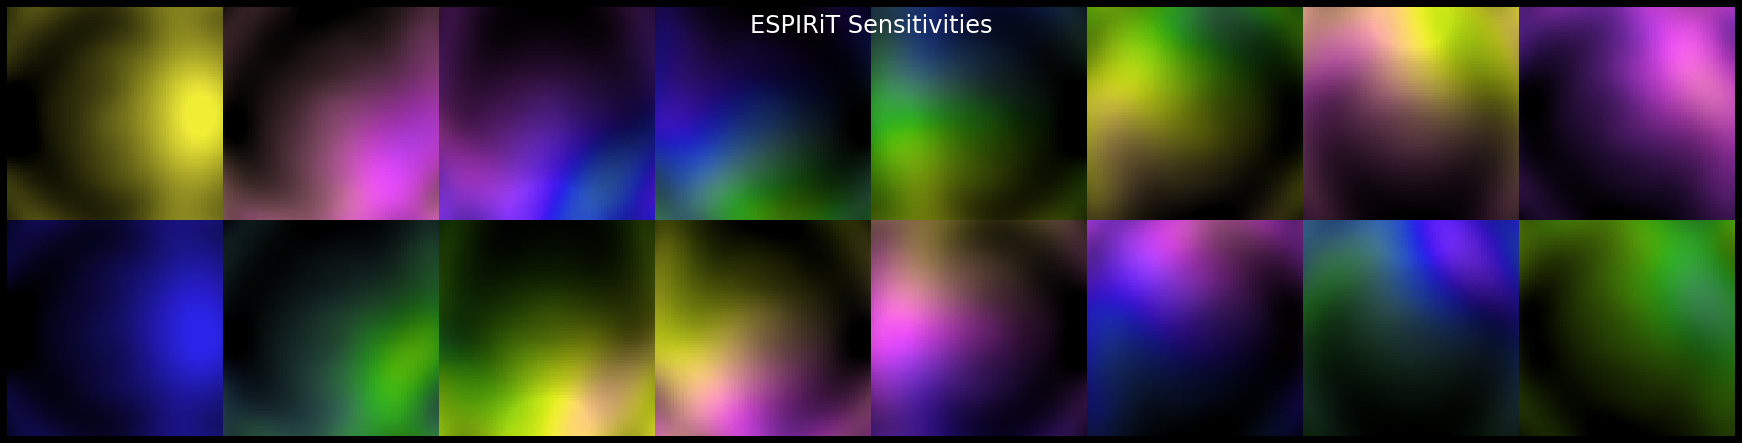

In [9]:
!riesling espirit --kb -v gap.h5 --fov=256
plot_sense('gap-espirit.h5', title='ESPIRiT Sensitivities')

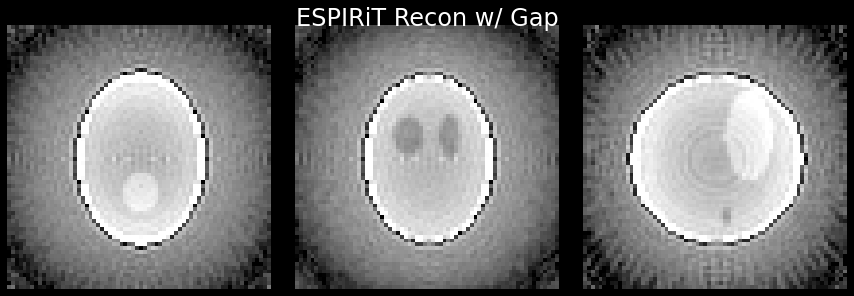

In [10]:
!riesling recon --kb --sense=gap-espirit.h5 gap.h5 -o gap-espirit --fov=256
plot_3plane('gap-espirit-recon.h5', title='ESPIRiT Recon w/ Gap')

# Iterative Reconstructions

Now perform some iterative reconstructions and compare the results. The cgSENSE method can fill the dead-time gap because each time we multiply by the sensitivities in image space we are convolving by the sensitivity kernel in k-space. However, this requires accurate sensitivities which can only be provided by ESPIRiT when the dead-time gap is present. These will take a while to run

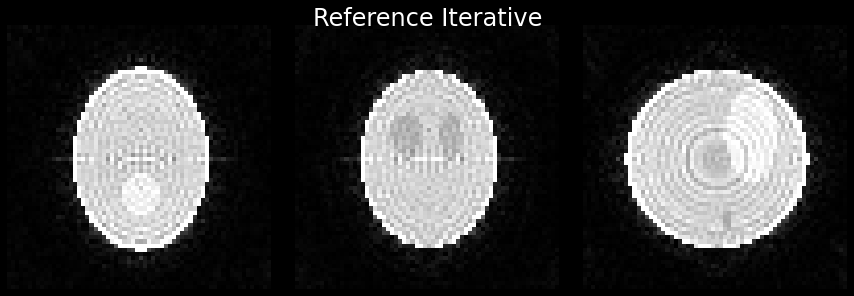

In [20]:
!riesling cg --kb full.h5 --sense=full-sense.h5 -o full-sense -i 4
plot_3plane('full-sense-cg.h5', title='Reference Iterative')

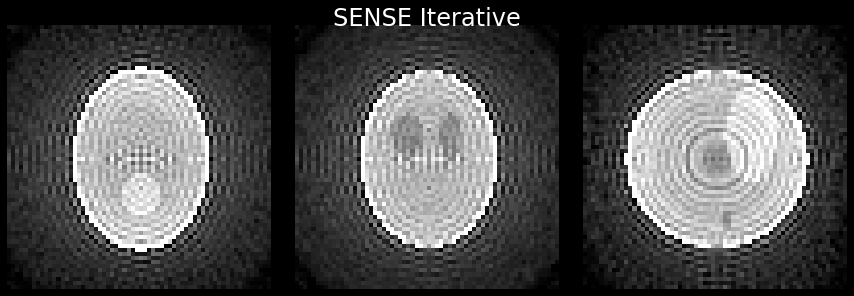

In [21]:
!riesling cg --kb gap.h5 --sense=gap-sense.h5 -o gap-sense  -i 4
plot_3plane('gap-sense-cg.h5', title='SENSE Iterative')

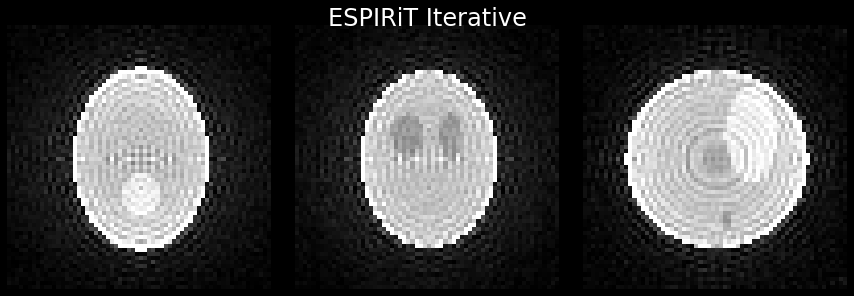

In [22]:
!riesling cg --kb gap.h5 --sense=gap-espirit.h5 -o gap-espirit  -i 4
plot_3plane('gap-espirit-cg.h5', title='ESPIRiT Iterative')

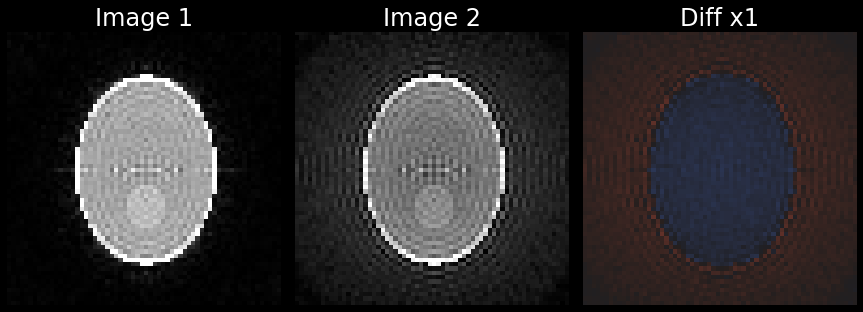

In [23]:
plot_diff('full-sense-cg.h5', 'gap-sense-cg.h5', component='mag')

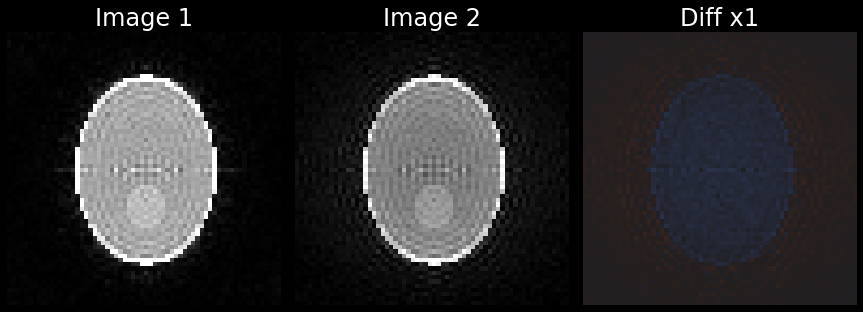

In [24]:
plot_diff('full-sense-cg.h5', 'gap-espirit-cg.h5', component='mag')